In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
df = pd.read_csv(url, names=['top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square','middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square','Class'])

In [ ]:
df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [ ]:
df=df.replace({'top-left-square':{'x':1,'o':-1,'b':0},'top-middle-square':{'x':1,'o':-1,'b':0},'top-right-square':{'x':1,'o':-1,'b':0},'middle-left-square':{'x':1,'o':-1,'b':0},'middle-middle-square':{'x':1,'o':-1,'b':0},'middle-right-square':{'x':1,'o':-1,'b':0},'bottom-left-square':{'x':1,'o':-1,'b':0},'bottom-middle-square':{'x':1,'o':-1,'b':0},'bottom-right-square':{'x':1,'o':-1,'b':0}})
print(df)

     top-left-square  top-middle-square  top-right-square  middle-left-square  \
0                  1                  1                 1                   1   
1                  1                  1                 1                   1   
2                  1                  1                 1                   1   
3                  1                  1                 1                   1   
4                  1                  1                 1                   1   
..               ...                ...               ...                 ...   
953               -1                  1                 1                   1   
954               -1                  1                -1                   1   
955               -1                  1                -1                   1   
956               -1                  1                -1                  -1   
957               -1                 -1                 1                   1   

     middle-middle-square  

In [ ]:
feature = ['top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square','middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square']
x = df.loc[:,feature]
y = df.loc[:,'Class']     
print(x)  

     top-left-square  top-middle-square  top-right-square  middle-left-square  \
0                  1                  1                 1                   1   
1                  1                  1                 1                   1   
2                  1                  1                 1                   1   
3                  1                  1                 1                   1   
4                  1                  1                 1                   1   
..               ...                ...               ...                 ...   
953               -1                  1                 1                   1   
954               -1                  1                -1                   1   
955               -1                  1                -1                   1   
956               -1                  1                -1                  -1   
957               -1                 -1                 1                   1   

     middle-middle-square  

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pct = pca.fit_transform(x)
principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])
finaldf= pd.concat([principal_df,df[['Class']]],axis=1)
print(finaldf)

              pc1       pc2     Class
0    5.180797e-15  2.359346  positive
1    1.000000e+00  1.728083  positive
2    1.316213e-14  1.262527  positive
3    5.000000e-01  1.495305  positive
4    1.113647e-14  1.810936  positive
..            ...       ...       ...
953  1.000000e+00 -0.465556  negative
954 -2.379287e-14  0.165707  negative
955 -1.000000e+00 -0.465556  negative
956  2.619382e-15 -1.096820  negative
957 -3.459401e-15 -1.096820  negative

[958 rows x 3 columns]


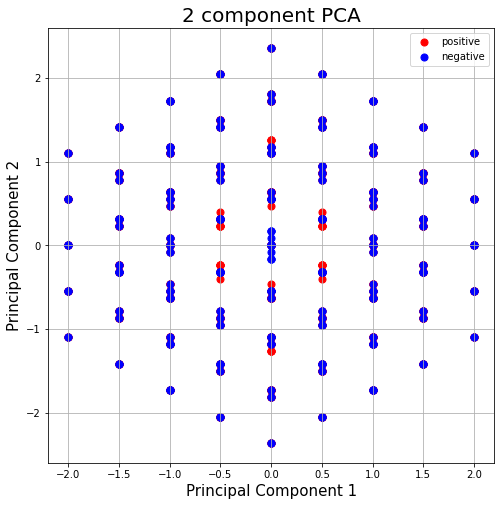

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
Classes = ['positive', 'negative']
colors = ['r', 'b']
for Class, color in zip(Classes,colors):
    indicesToKeep = finaldf['Class'] == Class
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(Classes)
ax.grid()